# Melbourne Housing Market Case Study

## Business Problem and Context

Our fictitious client, a Real Estate Company based in Melbourne would like to leverage new technology in order to better price homes that their clients are listing with them. While running a survey they noticed that real estate clients are growing increasingly weary of agencies underpricing homes in order to just get the sale. Their strategy is to solve this problem and take the uncertainty away from clients that deal with their company. Client uncertainty is not good when selling your most prized asset. The company has provided us with data they have accumulated over the last couple years to work with.

## Client Strategy

Create a more objective selling environment for customers by leveraging new technology. Implementation of this new system can create a point of difference for prospective customers choosing an agency to list their asset with. Successful implementation will potentially increase market share. We will attempt to automate the pricing process by creating a machine learning model that estimates the prices of unlisted homes.

## Analytical Objectives

Use the client provided data to produce insights inline with the objective of creating a machine learning model to accurately predict prices of unlisted homes. We will be predicting continuous numerical values so we will utilize regression based models to solve our task. We will choose the best performing model and hand the project over to the machine learning engineers for deployment.

In [3]:
#importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from datetime import datetime, timedelta
import missingno as msno
import scipy.stats as stat
from scipy.stats import iqr
import pylab
%matplotlib inline

## Data Understanding

In [4]:
m1 = pd.read_csv('Melbourne_housing_FULL.csv', parse_dates = ['Date'])

In [5]:
# initial analysis
# 20 independent features with price as the Target
m1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
# We have features with missing values and incorrect assigned Data types
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null datetime64[ns]
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), obj

In [7]:
m1.shape

(34857, 21)

## Feature Descriptions

**Suburb**: Suburb

**Address**: Address

**Rooms**: Number of rooms

**Price**: Price in Australian dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse;

**SellerG**: Real Estate Agent

**Date**: Date sold

**Distance**: Distance from CBD in Kilometres

**Regionname**: General Region (West, North West, North, North east …etc)

**Propertycount**: Number of properties that exist in the suburb.

**Bedroom2**: Scraped # of Bedrooms (from different source)

**Bathroom**: Number of Bathrooms

**Car**: Number of carspots

**Landsize**: Land Size in Metres

**BuildingArea**: Building Size in Metres

**YearBuilt**: Year the house was built

**CouncilArea**: Governing council for the area

**Lattitude**: Self explanatory

**Longtitude**: Self explanatory

In [8]:
m2 = m1.copy()

In [9]:
m2.describe().T # Summary statistics show outliers present for numericals

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [10]:
m2.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [11]:
percent_missing = m2.isnull().mean()* 100
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
#percent of missing data high in some features, will have to address these going forward

In [12]:
missing_value_df.sort_values('percent_missing', ascending = False)

,percent_missing
BuildingArea,60.576068
YearBuilt,55.386293
Landsize,33.881286
Car,25.039447
Bathroom,23.599277
Bedroom2,23.573457
Longtitude,22.882061
Lattitude,22.882061
Price,21.832057
Regionname,0.008607


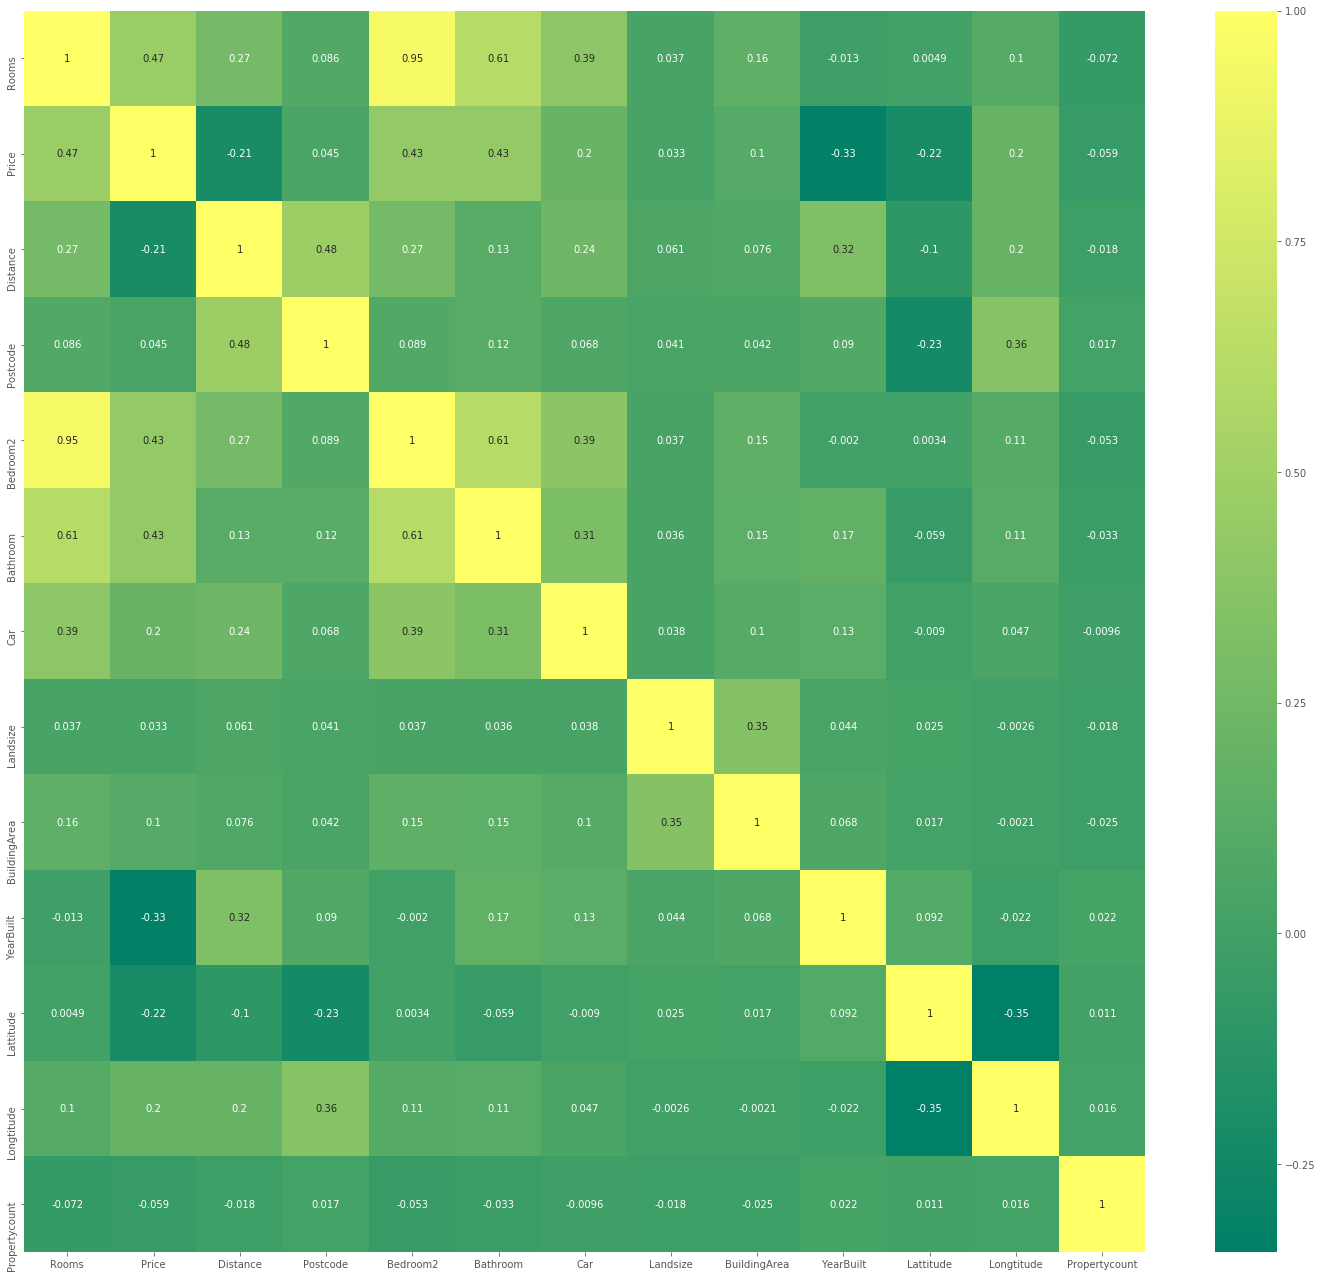

In [13]:
# correlation plot, let's look at how closely correlated the variables are
# Looking at this process for guidance on initial feature selection
plt.style.use('ggplot')
plt.figure(figsize=(20, 18))
sns.heatmap(m2.corr(), annot = True, cmap = 'summer')
plt.tight_layout()
# Rooms and Bedroom 2 seem highly correlated which makes sense
# We will drop one of these to avoid the noise it might create in our model

## Data Understanding Summary

- We have 9 Numerical Variables, 10 Categorical Variables and 2 Date(Temporal) Variables
- Price is our Target Variable
- Statistical summary indicates outliers in numerical variables
- Some variables have a high percentage of missing values
- Correlation matrix indicated high correlation between Bedroom2 Variable and Rooms

## Data Cleansing Stage

In [14]:
# let's fix the datatypes before moving on to Outliers and missing values

In [15]:
m2.select_dtypes(["object"]).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [16]:
obj_cat = ['Type', 'Suburb', 'Regionname', 'Address', 'Method', 'SellerG', 'CouncilArea', 'Regionname', 'Postcode']
for colname in obj_cat:
    m2[colname] = m2[colname].astype('category')

In [17]:
m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null category
Address          34857 non-null category
Rooms            34857 non-null int64
Type             34857 non-null category
Price            27247 non-null float64
Method           34857 non-null category
SellerG          34857 non-null category
Date             34857 non-null datetime64[ns]
Distance         34856 non-null float64
Postcode         34856 non-null category
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null category
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null category
Propertycount    34854 non-null float64
dtypes: category(8), datetime64[ns](1)

In [18]:
m3 = m2.copy()

## Handling Outliers

In [19]:
m3.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,26881.0,-3.781063e+01,0.090279,-38.19043,-37.86295,-37.8076,-3.775410e+01,-3.739020e+01


Text(0.5, 1.0, 'Prices')

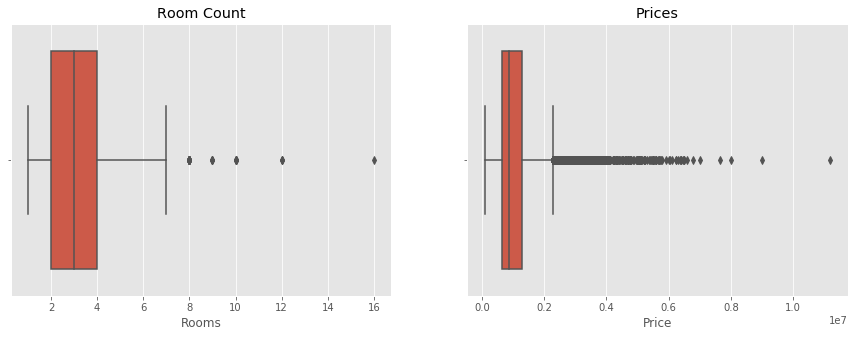

In [20]:
plt.style.use("ggplot")
fig, ax  = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot("Rooms", data= m3, ax = ax[0])
sns.boxplot("Price", data= m3, ax = ax[1])
ax[0].set_title("Room Count") # Using Boxplots to visualise outliers
ax[1].set_title("Prices")

Text(0.5, 1.0, 'Bathroom')

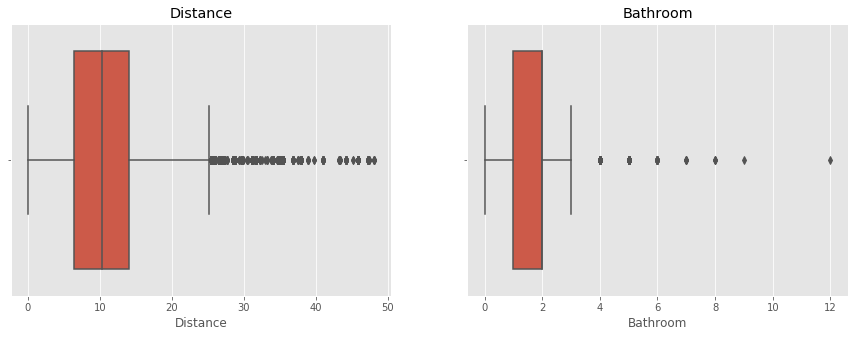

In [21]:
plt.style.use("ggplot")
fig, ax  = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot("Distance", data= m3, ax = ax[0])
sns.boxplot("Bathroom", data= m3, ax = ax[1])
ax[0].set_title("Distance") # Using Boxplots to visualize outliers
ax[1].set_title("Bathroom")

Text(0.5, 1.0, 'Landsize')

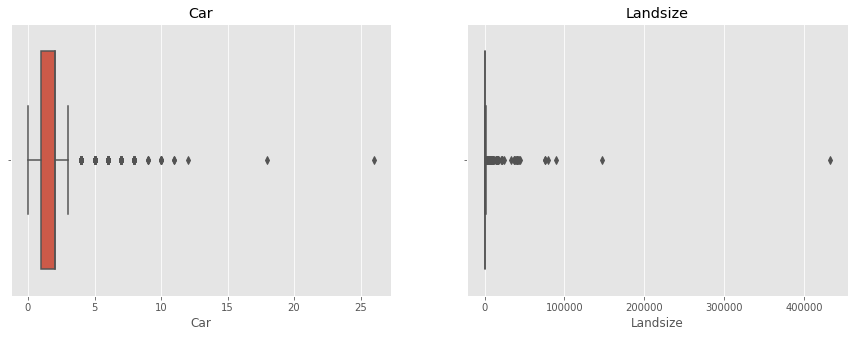

In [22]:
plt.style.use("ggplot")
fig, ax  = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot("Car", data= m3, ax = ax[0])
sns.boxplot("Landsize", data= m3, ax = ax[1])
ax[0].set_title("Car") # Using Boxplots to visualize outliers
ax[1].set_title("Landsize")

In [23]:
m4 = m3.copy()

### Applying outliers handling techniques

- Clear outlliers are present in the data set
- Methods explored before moving forward were IQR and Percentile
- Functions were created to handle outliers in these ways
- These techniques were not succesful when evaluated
- The technique chosen kept most of the data intact, although more customized and intensive

    def outliers(df, col):
        IQR = iqr(df[col], nan_policy = 'omit')
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        return df[(df[col]>lower_limit)&(df[col]<upper_limit)]

    Percentile
    def per_outliers(df, col):
        max_t = df[col].quantile(0.99)
        min_t = df[col].quantile(0.01)
        return df[(df[col]<max_t) & (df[col]>min_t)] 


In [24]:
#handling outliers
m4['Price'].value_counts(bins = 10, dropna = False)

(73884.999, 1196500.0]      19047
(1196500.0, 2308000.0]       6984
(2308000.0, 3419500.0]        944
(3419500.0, 4531000.0]        186
(4531000.0, 5642500.0]         60
(5642500.0, 6754000.0]         20
(6754000.0, 7865500.0]          3
(10088500.0, 11200000.0]        1
(8977000.0, 10088500.0]         1
(7865500.0, 8977000.0]          1
Name: Price, dtype: int64

In [25]:
index_p = m4[(m4['Price'] >= 3419500.0)].index
#print(index_p)
m4.drop(index_p, inplace = True)

In [26]:
m4['Price'].value_counts(bins = 10, dropna = False)#checking transformation

(416600.0, 748200.0]      8826
(748200.0, 1079800.0]     7331
(1079800.0, 1411400.0]    4386
(1411400.0, 1743000.0]    2287
(81683.999, 416600.0]     1390
(1743000.0, 2074600.0]    1301
(2074600.0, 2406200.0]     684
(2406200.0, 2737800.0]     376
(2737800.0, 3069400.0]     249
(3069400.0, 3401000.0]     145
Name: Price, dtype: int64

In [27]:
m4['Rooms'].value_counts(bins = 4, dropna = False)

(0.988, 3.75]    24853
(3.75, 6.5]       9671
(6.5, 9.25]         53
(9.25, 12.0]         8
Name: Rooms, dtype: int64

In [28]:
indexr = m4[(m4['Rooms'] >= 6.0) | (m4['Rooms'] < 1.0)].index
m4.drop(indexr, inplace = True)

In [29]:
m4['Rooms'].value_counts(bins = 4, dropna = False)#check

(2.0, 3.0]      15046
(0.995, 2.0]     9807
(3.0, 4.0]       7830
(4.0, 5.0]       1647
Name: Rooms, dtype: int64

In [30]:
m4['Distance'].value_counts(bins = 10, dropna = False)

(4.81, 9.62]       10815
(9.62, 14.43]      10725
(-0.0491, 4.81]     4940
(14.43, 19.24]      4194
(19.24, 24.05]      1908
(24.05, 28.86]       842
(28.86, 33.67]       394
(33.67, 38.48]       388
(43.29, 48.1]         96
(38.48, 43.29]        27
Name: Distance, dtype: int64

In [31]:
indexd = m4[(m4['Distance'] >= 24.05) | (m4['Distance'] <= 0.0)].index
m4.drop(indexd, inplace = True)

In [32]:
m4['Distance'].value_counts(bins = 10, dropna = False)#check

(9.94, 12.25]     5744
(7.63, 9.94]      5423
(5.32, 7.63]      4705
(12.25, 14.56]    4507
(3.01, 5.32]      4141
(14.56, 16.87]    2505
(0.676, 3.01]     2097
(16.87, 19.18]    1476
(19.18, 21.49]    1151
(21.49, 23.8]      757
Name: Distance, dtype: int64

In [33]:
m4['Bathroom'].value_counts(bins = 5, dropna = False)

(-0.013000000000000001, 2.4]    22577
(2.4, 4.8]                       2109
(4.8, 7.2]                         70
(9.6, 12.0]                         1
(7.2, 9.6]                          1
Name: Bathroom, dtype: int64

In [34]:
indexb = m4[(m4['Bathroom'] >= 4) | (m4['Bathroom'] <= 0.0)].index
m4.drop(indexb, inplace = True)

In [35]:
m4['Bathroom'].value_counts(bins = 5, dropna = False)#check

(0.997, 1.4]    12428
(1.8, 2.2]      10104
(2.6, 3.0]       1923
(2.2, 2.6]          0
(1.4, 1.8]          0
Name: Bathroom, dtype: int64

In [36]:
m4['Car'].value_counts(bins = 5, dropna = False)

(-0.027, 5.2]    23836
(5.2, 10.4]        150
(10.4, 15.6]         2
(20.8, 26.0]         1
(15.6, 20.8]         1
Name: Car, dtype: int64

In [37]:
indexc = m4[(m4['Car'] >= 5.0)].index
m4.drop(indexc, inplace = True)

In [38]:
m4['Car'].value_counts(bins = 5, dropna = False)#check

(1.6, 2.4]       10981
(0.8, 1.6]        8843
(-0.005, 0.8]     1528
(2.4, 3.2]        1408
(3.2, 4.0]         957
Name: Car, dtype: int64

In [39]:
m4['Landsize'].value_counts(bins = 20, dropna = False)

(-433.015, 21650.7]     21044
(21650.7, 43301.4]          5
(64952.1, 86602.8]          1
(411363.3, 433014.0]        1
(324760.5, 346411.2]        0
(303109.8, 324760.5]        0
(281459.1, 303109.8]        0
(259808.4, 281459.1]        0
(238157.7, 259808.4]        0
(216507.0, 238157.7]        0
(389712.6, 411363.3]        0
(173205.6, 194856.3]        0
(151554.9, 173205.6]        0
(129904.2, 151554.9]        0
(108253.5, 129904.2]        0
(86602.8, 108253.5]         0
(346411.2, 368061.9]        0
(43301.4, 64952.1]          0
(368061.9, 389712.6]        0
(194856.3, 216507.0]        0
Name: Landsize, dtype: int64

In [40]:
indexl = m4[(m4['Landsize'] >= 2171.5) | (m4['Landsize'] <= 0.0)].index
m4.drop(indexl, inplace = True)

In [41]:
m4['Landsize'].value_counts(bins = 20, dropna = False)#check

(542.25, 650.5]      3664
(650.5, 758.75]      2951
(109.25, 217.5]      2568
(217.5, 325.75]      2390
(434.0, 542.25]      2071
(325.75, 434.0]      1838
(758.75, 867.0]      1164
(-1.166, 109.25]      567
(867.0, 975.25]       460
(975.25, 1083.5]      266
(1083.5, 1191.75]     141
(1191.75, 1300.0]      74
(1300.0, 1408.25]      51
(1408.25, 1516.5]      40
(1516.5, 1624.75]      32
(1949.5, 2057.75]      31
(1624.75, 1733.0]      29
(1733.0, 1841.25]      25
(2057.75, 2166.0]      20
(1841.25, 1949.5]      14
Name: Landsize, dtype: int64

In [42]:
#we will have a look at YearBuilt as well here incase there is some outliers present
m4['YearBuilt'].value_counts(bins = 7, dropna = False)

(1846.0, 1976.0]      7616
(1976.0, 2106.0]      4744
(1716.0, 1846.0]         2
(1195.089, 1326.0]       1
(1586.0, 1716.0]         0
(1456.0, 1586.0]         0
(1326.0, 1456.0]         0
Name: YearBuilt, dtype: int64

In [43]:
indexy = m4[(m4['YearBuilt'] <= 1900)].index
m4.drop(indexy, inplace = True)

In [44]:
m4.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,28034.0,3.051009e+00,0.876228,1.00000,2.000000,3.00000,4.000000e+00,5.000000e+00
Price,21962.0,1.042176e+06,525870.137652,112000.00000,665000.000000,900000.00000,1.300000e+06,3.401000e+06
Distance,28033.0,1.075613e+01,4.888513,0.70000,7.200000,10.50000,1.390000e+01,2.380000e+01
Bedroom2,20293.0,3.141724e+00,0.846498,0.00000,3.000000,3.00000,4.000000e+00,2.000000e+01
Bathroom,20285.0,1.608479e+00,0.640393,1.00000,1.000000,2.00000,2.000000e+00,3.000000e+00
Car,19945.0,1.735172e+00,0.843178,0.00000,1.000000,2.00000,2.000000e+00,4.000000e+00
Landsize,17240.0,5.243176e+02,274.024507,1.00000,308.000000,551.00000,6.760000e+02,2.166000e+03
BuildingArea,9862.0,1.609246e+02,126.755877,0.00000,110.000000,141.00000,1.920000e+02,6.791000e+03
YearBuilt,11121.0,1.969731e+03,31.125470,1901.00000,1950.000000,1970.00000,2.000000e+03,2.106000e+03
Lattitude,20522.0,-3.780479e+01,0.080926,-38.03171,-37.862048,-37.79850,-3.774637e+01,-3.753040e+01


In [45]:
#Looking at the skew here we can see we have distribution closer to the 0 value we are looking for
#Car is further away from zero but in this context it is ok
print(m4[['Price', 'Rooms', 'Distance', 'Car', 'Landsize', 'Bathroom']].skew())

Price       1.368364
Rooms       0.054017
Distance    0.375922
Car         0.483805
Landsize    1.087773
Bathroom    0.571858
dtype: float64


In [46]:
#Before addressing outliers
print(m3[['Price', 'Rooms', 'Distance', 'Car', 'Landsize', 'Bathroom']].skew())

Price        2.588969
Rooms        0.499097
Distance     1.503586
Car          2.095176
Landsize    96.022311
Bathroom     1.356293
dtype: float64


Text(0.5, 1.0, 'Prices')

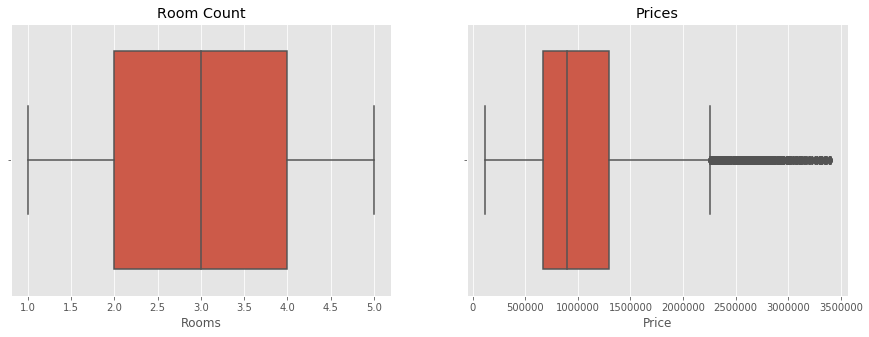

In [47]:
plt.style.use("ggplot")
fig, ax  = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot("Rooms", data= m4, ax = ax[0])
sns.boxplot("Price", data= m4, ax = ax[1])
ax[0].set_title("Room Count") # Using Boxplots to visualise distribution
ax[1].set_title("Prices")# Much better distribution on both accounts

Text(0.5, 1.0, 'Car')

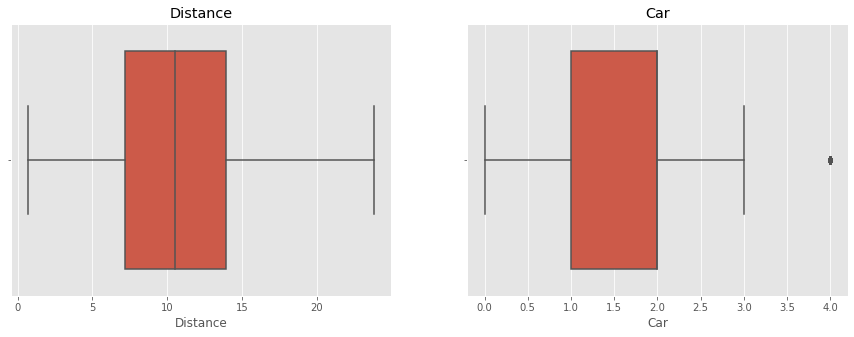

In [48]:
plt.style.use("ggplot")
fig, ax  = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot("Distance", data= m4, ax = ax[0])
sns.boxplot("Car", data= m4, ax = ax[1])
ax[0].set_title("Distance") # Using Boxplots to visualise outliers
ax[1].set_title("Car") #Better distributions here

Text(0.5, 1.0, 'Bathroom')

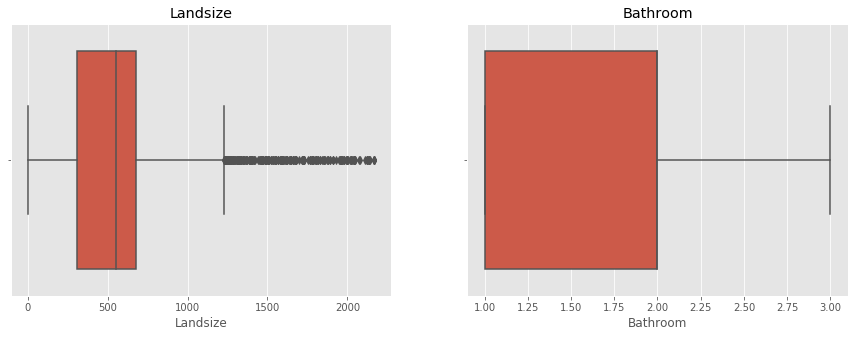

In [49]:
plt.style.use("ggplot")
fig, ax  = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot("Landsize", data= m4, ax = ax[0])
sns.boxplot("Bathroom", data= m4, ax = ax[1])
ax[0].set_title("Landsize") # Using Boxplots to visualise outliers
ax[1].set_title("Bathroom") #Better distributions here

## Outlier Management Results

- Outliers have been trimmed, Landsize has some skewness which can be addressed.
- Outlier trimming was done using indivdual feature binning across the distribution
- Resulting feature distributions have improved after trimming
- For a larger dataset I might have to use a more general approach eg. create a general function that iterates through all columns with outliers. Use IQR or Percentile Capping for all features with a function and a loop.

## Missing Value analysis and Imputation

- From the correlation matrix above we see that bedroom2 and rooms are highly correlated
- We will drop bedroom 2
- We have a missing value threshold of 60% to drop columns entirely 
- Building Area and Year built are candidates for dropping
- We do not want to lose data if possible
- Our dependent variable price has ~22 percent missing data we will assess this after all other variables are handled

In [50]:
pct_missing = m4.isnull().mean()* 100
missing_value_df = pd.DataFrame({'pct_missing': pct_missing}) #Missing values after outliers

In [51]:
missing_value_df.sort_values('pct_missing', ascending = False) 

,pct_missing
BuildingArea,64.821288
YearBuilt,60.330313
Landsize,38.503246
Car,28.854248
Bathroom,27.641435
Bedroom2,27.612899
Longtitude,26.796033
Lattitude,26.796033
Price,21.659414
Regionname,0.010701


In [52]:
m5 = m4.drop(['Bedroom2', 'BuildingArea'],axis = 1)
#missing and highly correlated
#Longtitude and Lattitude(Geo) are well represented categorically so we can drop, we will impute and keep for now
#Building Area has too many missing values more than the 60% threshold set, this will dropped

In [53]:
m5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28034 entries, 0 to 34856
Data columns (total 19 columns):
Suburb           28034 non-null category
Address          28034 non-null category
Rooms            28034 non-null int64
Type             28034 non-null category
Price            21962 non-null float64
Method           28034 non-null category
SellerG          28034 non-null category
Date             28034 non-null datetime64[ns]
Distance         28033 non-null float64
Postcode         28033 non-null category
Bathroom         20285 non-null float64
Car              19945 non-null float64
Landsize         17240 non-null float64
YearBuilt        11121 non-null float64
CouncilArea      28031 non-null category
Lattitude        20522 non-null float64
Longtitude       20522 non-null float64
Regionname       28031 non-null category
Propertycount    28031 non-null float64
dtypes: category(8), datetime64[ns](1), float64(9), int64(1)
memory usage: 4.5 MB


In [54]:
m5.isnull().sum().sort_values(ascending = False)

YearBuilt        16913
Landsize         10794
Car               8089
Bathroom          7749
Longtitude        7512
Lattitude         7512
Price             6072
Propertycount        3
CouncilArea          3
Regionname           3
Postcode             1
Distance             1
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Address              0
Suburb               0
dtype: int64

In [55]:
m5.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,1.0,1.0,126.0,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,2.0,1.0,94.0,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,1.0,2.0,120.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,2.5,3067.0,2.0,2.0,400.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0


## Visualize missingness

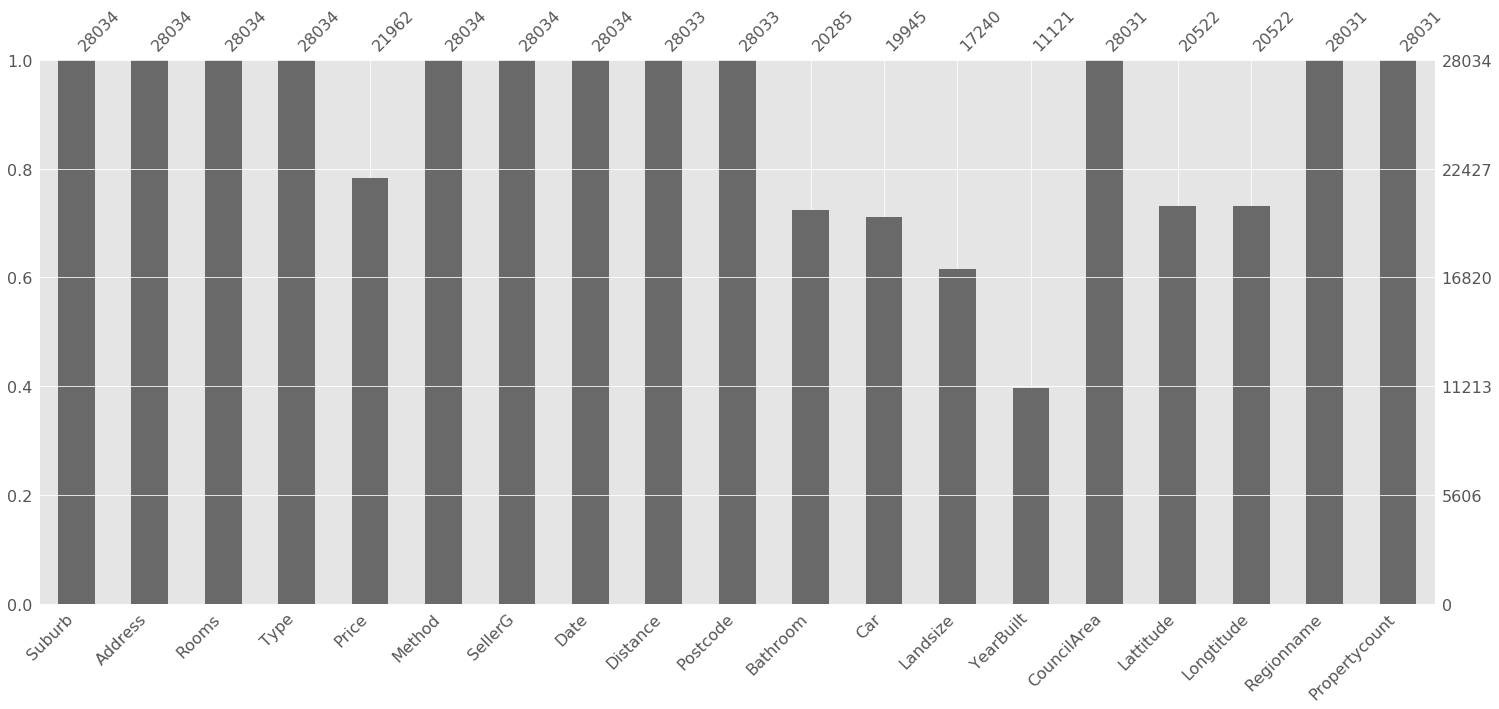

In [56]:
msno.bar(m5)

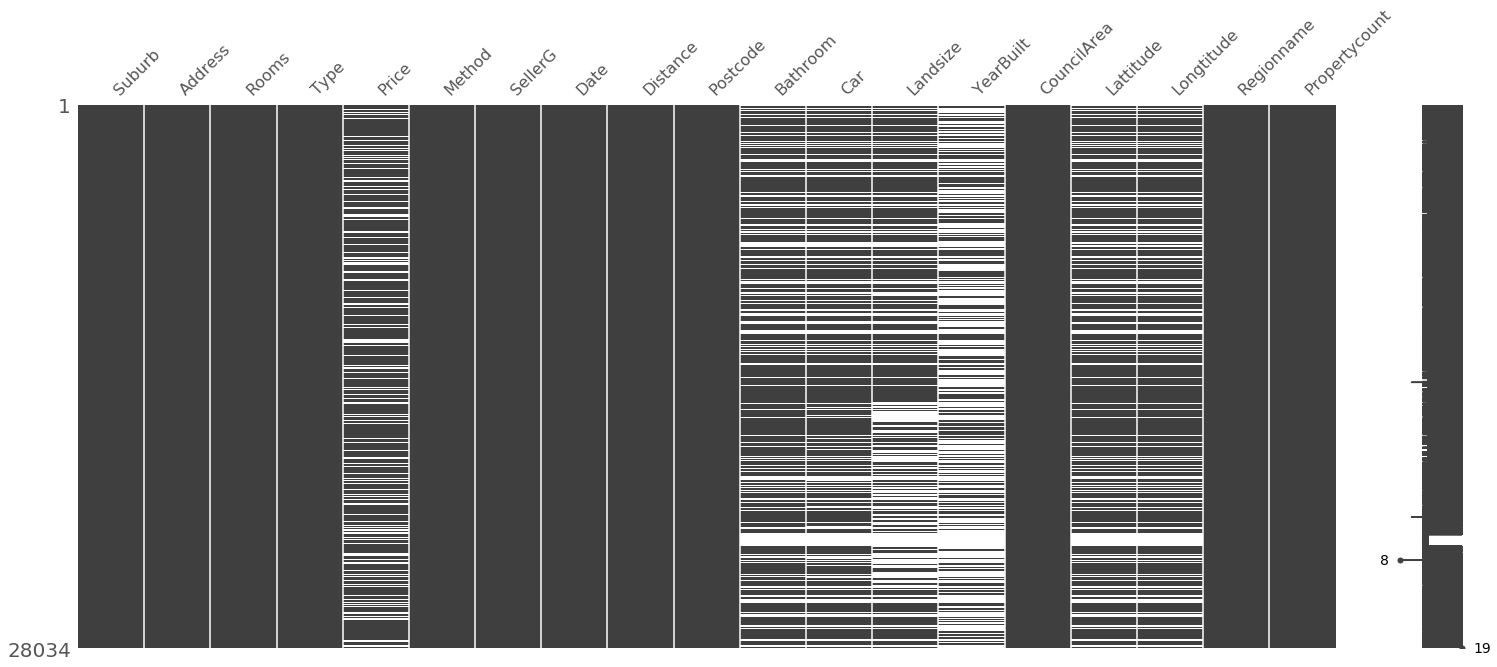

In [57]:
msno.matrix(m5)

In [58]:
df_miss = m5[m5['Regionname'].isna()]# Many missing values in these rows

In [59]:
df_miss.head()#Distance and postcode have just one value missing thise can be dropped as well

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18523,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,2017-07-15,5.1,3011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,2017-11-11,7.7,3124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,2018-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
m5 = (m5.dropna(subset = ['Regionname','Propertycount','CouncilArea','Distance','Postcode']))

In [61]:
m5.isnull().sum().sort_values(ascending = False)#great now we can deal with these columns accordingly

YearBuilt        16910
Landsize         10791
Car               8086
Bathroom          7746
Longtitude        7509
Lattitude         7509
Price             6072
Propertycount        0
Method               0
Address              0
Rooms                0
Type                 0
Postcode             0
SellerG              0
Date                 0
Distance             0
Regionname           0
CouncilArea          0
Suburb               0
dtype: int64

In [62]:
df_miss1 = m5[m5['YearBuilt'].isna()]

In [63]:
df_miss1.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,1.0,1.0,126.0,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,2.0,1.0,94.0,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
10,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,2016-07-05,2.5,3067.0,1.0,0.0,181.0,NaN,Yarra City Council,-37.8041,144.9953,Northern Metropolitan,4019.0
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,2016-08-10,2.5,3067.0,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
19,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,2016-08-10,2.5,3067.0,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
21,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,2016-10-12,2.5,3067.0,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
22,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,2016-10-12,2.5,3067.0,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
26,Abbotsford,22 Park St,4,h,1985000.0,S,Biggin,2016-12-11,2.5,3067.0,NaN,NaN,NaN,NaN,Yarra City Council,-37.8084,144.9942,Northern Metropolitan,4019.0


### Let's look at the distribution of variables with missing data
- For car and bathroom we will use mode as that is appropriate for this type of data
- Lattitude and Longitude are widely spread out, this data is adequately represented in the data but I will impute and identify if value is added
- Price as our dependent variable will not be imputed, do not want to alter the originality of the data here

Text(0.5, 1.0, 'Landsize')

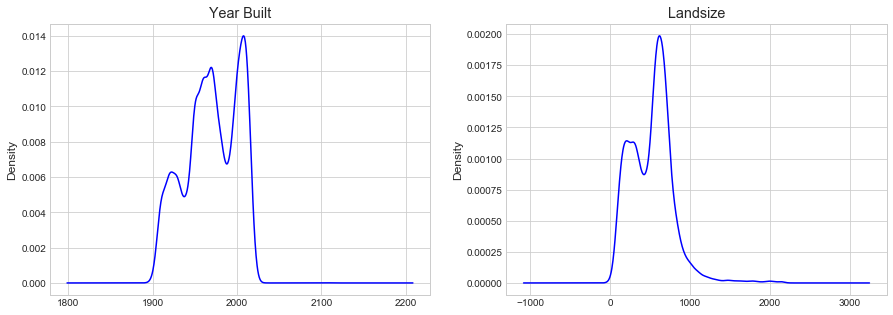

In [64]:
plt.style.use("seaborn-whitegrid")
fig, ax  = plt.subplots(1, 2, figsize = (15, 5))
m5['YearBuilt'].plot(kind = 'kde', ax = ax[0], color = 'blue')
m5['Landsize'].plot(kind = 'kde', ax = ax[1], color = 'blue')
ax[0].set_title("Year Built") 
ax[1].set_title("Landsize") 
#These distribtutions are not normal so we will not use simple mean imputation, we will need something more robust
#median or a random sample

In [65]:
# Function to impute missing data with median and random samples
def impute_miss(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state = 0, replace = True)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+"_random"] = random_sample

In [66]:
median_y = m5['YearBuilt'].median() #calculate median
median_y

1970.0

In [67]:
median_l = m5['Landsize'].median()
median_l

551.0

In [68]:
impute_miss(m5, 'YearBuilt', median_y) #impute YearBuilt with median

In [69]:
impute_miss(m5, 'Landsize', median_l)#impute Landsize with median

In [70]:
m5.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,YearBuilt_median,YearBuilt_random,Landsize_median,Landsize_random
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,1970.0,2014.0,126.0,126.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,1970.0,2002.0,202.0,202.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,...,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,1970.0,1990.0,94.0,94.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,2014.0,2014.0,120.0,120.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,2.5,3067.0,...,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0,2006.0,2006.0,400.0,400.0


In [71]:
print(m5['YearBuilt'].std())
print(m5['YearBuilt_median'].std())# the variance is affected quite alot here

31.1254699058211
19.60498658508976


In [72]:
print(m5['Landsize'].std())
print(m5['Landsize_median'].std())#variance is distorted here as well

274.0245069304615
215.2906065965864


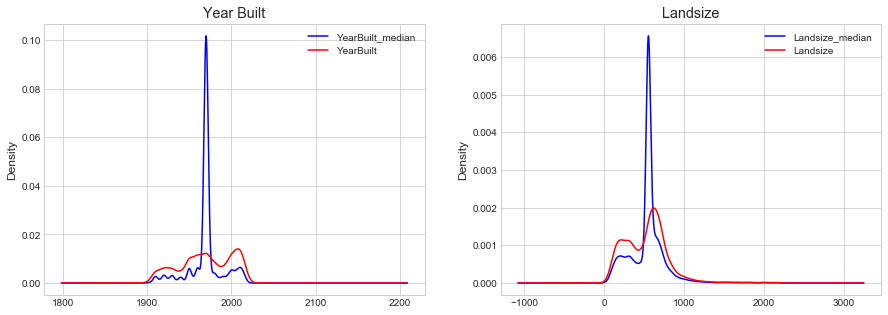

In [73]:
# Visualizing the effect of the imputation techniques
plt.style.use("seaborn-whitegrid")
fig, ax  = plt.subplots(1, 2, figsize = (15, 5))
m5['YearBuilt_median'].plot(kind = 'kde', ax = ax[0], color = 'blue')
m5['Landsize_median'].plot(kind = 'kde', ax = ax[1], color = 'blue')
m5['YearBuilt'].plot(kind = 'kde', ax = ax[0], color = 'red')
m5['Landsize'].plot(kind = 'kde', ax = ax[1], color = 'red')
ax[0].set_title("Year Built") 
ax[1].set_title("Landsize") 
ax[0].legend(loc='best')
ax[1].legend(loc='best')

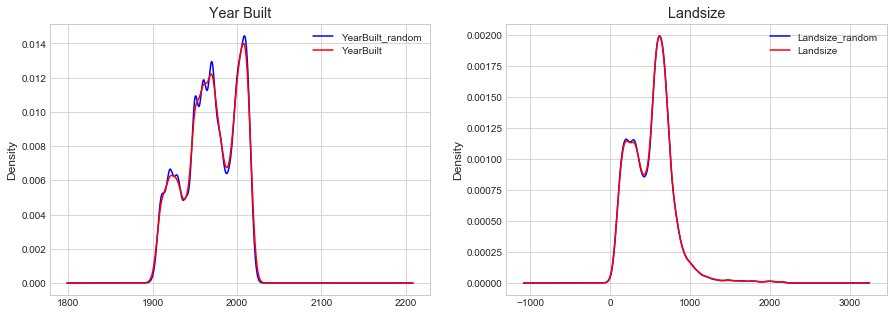

In [74]:
plt.style.use("seaborn-whitegrid")
fig, ax  = plt.subplots(1, 2, figsize = (15, 5))
m5['YearBuilt_random'].plot(kind = 'kde', ax = ax[0], color = 'blue')
m5['Landsize_random'].plot(kind = 'kde', ax = ax[1], color = 'blue')
m5['YearBuilt'].plot(kind = 'kde', ax = ax[0], color = 'red')
m5['Landsize'].plot(kind = 'kde', ax = ax[1], color = 'red')
ax[0].set_title("Year Built") 
ax[1].set_title("Landsize") 
ax[0].legend(loc='best')
ax[1].legend(loc='best')
#With the random samples the variance has hardly changed it seems like a better result

In [75]:
#For lattitude and longtitude we will use random sample imputation as well, visualizing the distribution won't be an option here

In [76]:
def impute_ran(df, variable):
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state = 0, replace = True)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+"_random"] = random_sample

In [77]:
impute_ran(m5, 'Lattitude')

In [78]:
impute_ran(m5, 'Longtitude')

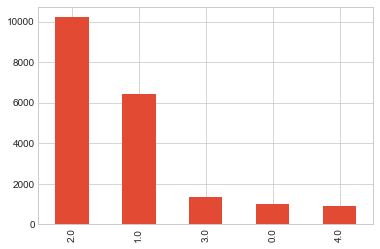

In [79]:
#Car and Bathroom next, more discrete in nature
m5['Car'].value_counts().plot.bar()
#mode will be a good option

In [80]:
m5['Car']=m5['Car'].fillna(m5['Car'].mode()[0])

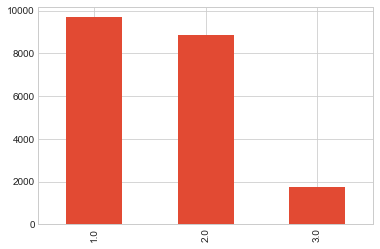

In [81]:
m5['Bathroom'].value_counts().plot.bar()
#close between 1 and 2, the random sample option can work aswell here

In [82]:
impute_ran(m5, 'Bathroom')

In [83]:
m5.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'YearBuilt_median', 'YearBuilt_random',
       'Landsize_median', 'Landsize_random', 'Lattitude_random',
       'Longtitude_random', 'Bathroom_random'],
      dtype='object')

In [84]:
m5 = m5.drop(['YearBuilt','YearBuilt_median','Landsize', 'Landsize_median', 'Bathroom', 'Lattitude','Longtitude'],axis = 1)

In [85]:
m5.isnull().sum().sort_values(ascending = False)#great just our dependent variable left

Price                6072
Bathroom_random         0
Distance                0
Address                 0
Rooms                   0
Type                    0
Method                  0
SellerG                 0
Date                    0
Postcode                0
Longtitude_random       0
Car                     0
CouncilArea             0
Regionname              0
Propertycount           0
YearBuilt_random        0
Landsize_random         0
Lattitude_random        0
Suburb                  0
dtype: int64

## Reasoning behind Imputation

- Missing value imputation was done to numerical and discrete variables accordingly
- We did not want to distort the variance of features if possible to keep the integrity of the original distribution
- The assumption for this project was all missing values were completely at Random

## Exploratory Data analysis

- We will be looking at interactions between the Price(dependent) and our independent variables here

In [86]:
m5.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Car,CouncilArea,Regionname,Propertycount,YearBuilt_random,Landsize_random,Lattitude_random,Longtitude_random,Bathroom_random
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,1.0,Yarra City Council,Northern Metropolitan,4019.0,2014.0,126.0,-37.8014,144.9958,1.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,Yarra City Council,Northern Metropolitan,4019.0,2002.0,202.0,-37.7996,144.9984,1.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,1.0,Yarra City Council,Northern Metropolitan,4019.0,1990.0,94.0,-37.7969,144.9969,2.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,2.0,Yarra City Council,Northern Metropolitan,4019.0,2014.0,120.0,-37.8072,144.9941,1.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,2.5,3067.0,2.0,Yarra City Council,Northern Metropolitan,4019.0,2006.0,400.0,-37.7965,144.9965,2.0


In [87]:
m5.nunique() # Categorical unique value scan

Suburb                 264
Address              27407
Rooms                    5
Type                     3
Price                 2538
Method                   9
SellerG                336
Date                    78
Distance               162
Postcode               152
Car                      5
CouncilArea             26
Regionname               6
Propertycount          258
YearBuilt_random       119
Landsize_random       1355
Lattitude_random     11263
Longtitude_random    12228
Bathroom_random          3
dtype: int64

In [88]:
m5.info() # scanning our numeric and categorical variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28031 entries, 0 to 34856
Data columns (total 19 columns):
Suburb               28031 non-null category
Address              28031 non-null category
Rooms                28031 non-null int64
Type                 28031 non-null category
Price                21959 non-null float64
Method               28031 non-null category
SellerG              28031 non-null category
Date                 28031 non-null datetime64[ns]
Distance             28031 non-null float64
Postcode             28031 non-null category
Car                  28031 non-null float64
CouncilArea          28031 non-null category
Regionname           28031 non-null category
Propertycount        28031 non-null float64
YearBuilt_random     28031 non-null float64
Landsize_random      28031 non-null float64
Lattitude_random     28031 non-null float64
Longtitude_random    28031 non-null float64
Bathroom_random      28031 non-null float64
dtypes: category(8), datetime64[ns](1), fl

In [89]:
m5['Regionname'] = m5['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'}) #Columns are too long for display

In [90]:
m5['Year']=m5['Date'].apply(lambda x:x.year) # A year/month column might be useful for analysis over a time period
# also reduces cardinality of the date function

In [91]:
m5['Month']=m5['Date'].apply(lambda x:x.month)

In [92]:
m5.head()# We will be looking at interactions with Price as the dependant variable 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Regionname,Propertycount,YearBuilt_random,Landsize_random,Lattitude_random,Longtitude_random,Bathroom_random,Year,Month
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,Yarra City Council,N Metro,4019.0,2014.0,126.0,-37.8014,144.9958,1.0,2016,3
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,Yarra City Council,N Metro,4019.0,2002.0,202.0,-37.7996,144.9984,1.0,2016,3
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,...,Yarra City Council,N Metro,4019.0,1990.0,94.0,-37.7969,144.9969,2.0,2017,4
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,Yarra City Council,N Metro,4019.0,2014.0,120.0,-37.8072,144.9941,1.0,2016,4
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,2.5,3067.0,...,Yarra City Council,N Metro,4019.0,2006.0,400.0,-37.7965,144.9965,2.0,2016,6


In [93]:
reg_group = m5.groupby(['Regionname'])

Text(0, 0.5, 'Price')

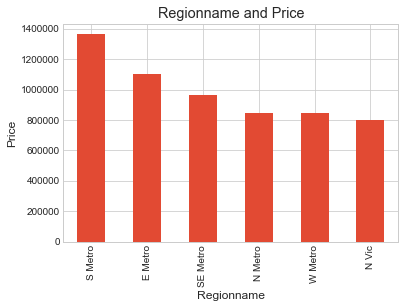

In [94]:
reg_group['Price'].mean().sort_values(ascending = False).plot.bar()
plt.title("Regionname and Price")
plt.ylabel('Price') # Prices are more valuable in certain regions

Text(0, 0.5, 'Price')

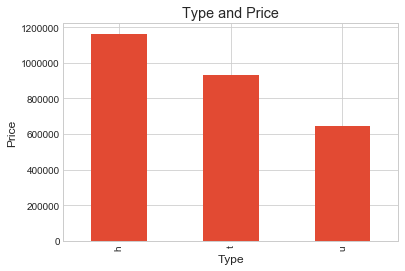

In [95]:
typ_group = m5.groupby(['Type'])
typ_group['Price'].mean().plot.bar() #house prices are more, makes sense
plt.title("Type and Price")
plt.ylabel('Price')

Text(0, 0.5, 'Price')

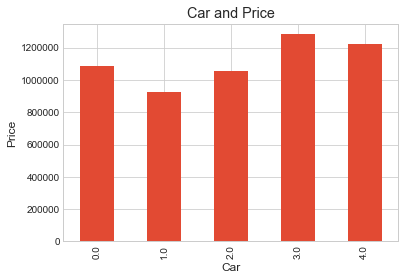

In [96]:
car_group = m5.groupby(['Car'])
car_group['Price'].mean().plot.bar() # 3 and 4 car garage homes are a little more expensive
plt.title("Car and Price")
plt.ylabel('Price')

Text(0, 0.5, 'Price')

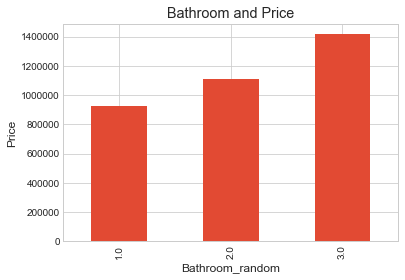

In [97]:
bath_group = m5.groupby(['Bathroom_random'])
bath_group['Price'].mean().plot.bar() #intuitive again and slightly monotonic
plt.title("Bathroom and Price")
plt.ylabel('Price')# As bathrooms increase so does price

Text(0, 0.5, 'Price')

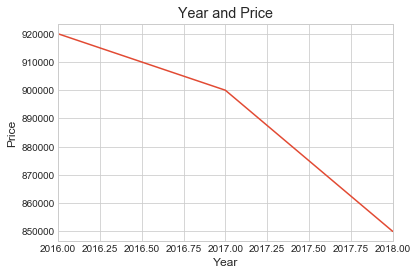

In [98]:
yr_group = m5.groupby(['Year'])
yr_group['Price'].median().plot.line()
plt.title("Year and Price")
plt.ylabel('Price')#A drop in price over time for the dataset, opposite to what intuitively occurs

(0.0, 118.0)

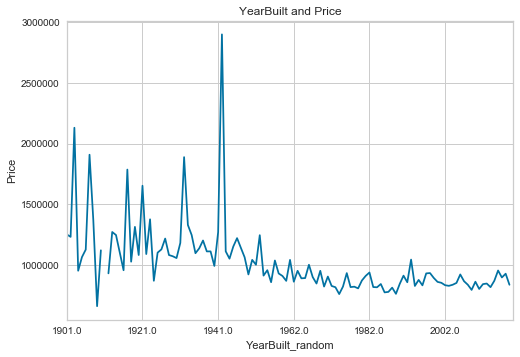

In [206]:
yrb_group = m5.groupby(['YearBuilt_random'])
yrb_group['Price'].median().plot.line()
plt.title("YearBuilt and Price")
plt.ylabel('Price')
plt.xlim()# Temporal Variable with some seasonality and variation over time

Text(0, 0.5, 'Price')

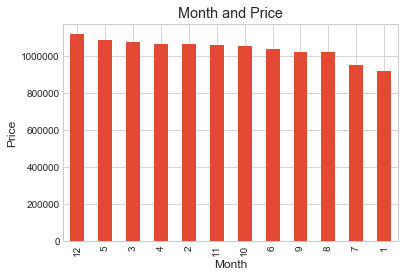

In [100]:
mt_group = m5.groupby(['Month'])
mt_group['Price'].mean().sort_values(ascending = False).plot.bar()
plt.title("Month and Price")
plt.ylabel('Price')
# December sales yield the highest prices, but no major variation

Text(0, 0.5, 'Price')

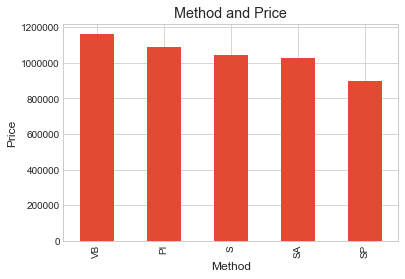

In [101]:
mthd_group = m5.groupby(['Method'])
mthd_group['Price'].mean().sort_values(ascending = False).head().plot.bar()
plt.title("Method and Price")
plt.ylabel('Price')
# 'Vendor Bid' and 'Property Passed In' method related to high price

Text(0, 0.5, 'Price')

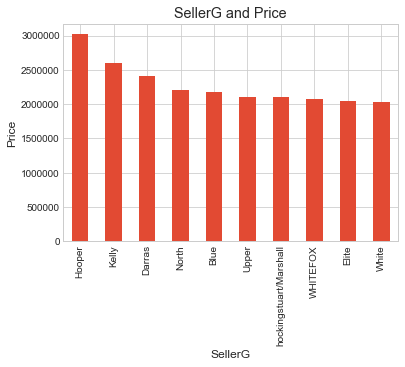

In [102]:
sellg_group = m5.groupby(['SellerG'])
sellg_group['Price'].mean().sort_values(ascending = False).head(10).plot.bar() #Hooper agency related to highest price values
plt.title("SellerG and Price")
plt.ylabel('Price')

Text(0, 0.5, 'Price')

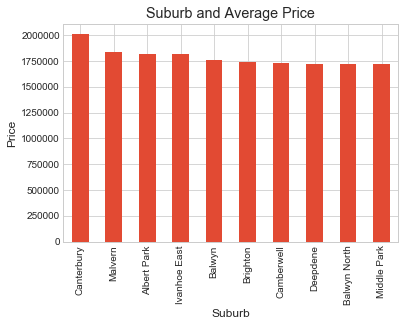

In [103]:
sub_group = m5.groupby(['Suburb'])
sub_group['Price'].mean().sort_values(ascending = False).head(10).plot.bar() #Suburbs related to highest prices
plt.title("Suburb and Average Price")
plt.ylabel('Price')# A top ten view here
#Cantebury leading the way, with Malvern and Albert Park behind

Text(0, 0.5, 'Price')

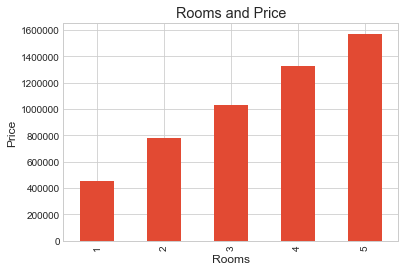

In [104]:
rm_group = m5.groupby(['Rooms'])
rm_group['Price'].mean().plot.bar()#monotonic relationship here
plt.title("Rooms and Price")
plt.ylabel('Price')# As rooms increase so does price

Text(0.5, 1.0, 'Distance and Price')

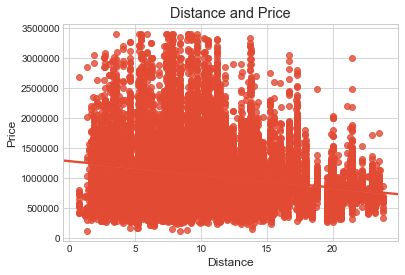

In [105]:
#numericals
plt.figure(figsize = (6,4))
sns.set_style('whitegrid')
sns.regplot(x="Distance", y="Price", data=m5, logx =False) # The further away from CBD the cheaper the home.
plt.title('Distance and Price')

Text(0.5, 1.0, 'Landsize and Price')

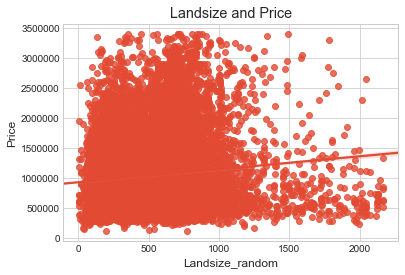

In [106]:
plt.figure(figsize = (6,4))
sns.set_style('whitegrid')
sns.regplot(x="Landsize_random", y="Price", data=m5, logx =False) # A weak postive trend between Landsize and Price
plt.title('Landsize and Price')

In [107]:
pd.crosstab([m5.Regionname], [m5.Car], margins = True)# interesting distributions here

Car,0.0,1.0,2.0,3.0,4.0,All
Regionname,,,,,,
E Metro,114,764,2837,181,102,3998
N Metro,386,2174,4695,322,265,7842
N Vic,3,3,23,3,2,34
S Metro,281,1893,6436,446,277,9333
SE Metro,9,156,723,47,52,987
W Metro,229,1447,3586,346,229,5837
All,1022,6437,18300,1345,927,28031


In [108]:
pd.crosstab([m5.Regionname], [m5.Rooms], margins = True) # 3 beds are most popular across the board

Rooms,1,2,3,4,5,All
Regionname,,,,,,
E Metro,18,510,1843,1323,304,3998
N Metro,302,2182,3790,1360,208,7842
N Vic,1,5,13,13,2,34
S Metro,417,2358,3667,2367,524,9333
SE Metro,10,142,470,298,67,987
W Metro,93,1039,3143,1345,217,5837
All,841,6236,12926,6706,1322,28031


In [109]:
int_col = ['Year', 'YearBuilt_random']
for colname in int_col:
    m5[colname] = m5[colname].astype('category') #Not floats so we will convert to correct DataType

In [110]:
m6 = m5[['Year', 'Price', 'Type']]

In [111]:
#Grouping data by type 
#house price
m6_h=m6[m6['Type']=='h']
#unit price
m6_u=m6[m6['Type']=='u']
#townhouse price
m6_t=m6[m6['Type']=='t']

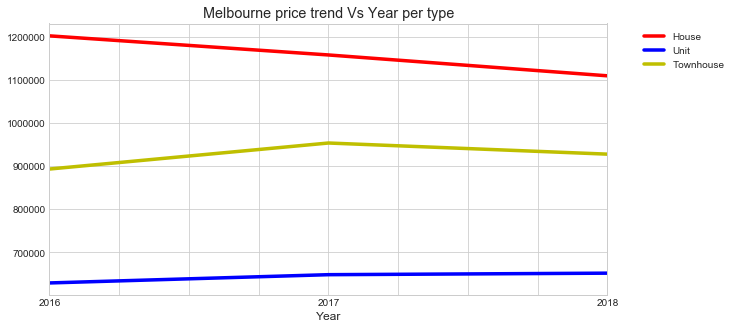

In [112]:
fig, ax  = plt.subplots(figsize = (10, 5))
m6_h.groupby('Year').mean().plot.line(ax = ax, color = 'r', linewidth = 3.5)
m6_u.groupby('Year').mean().plot.line(ax = ax, color = 'b', linewidth = 3.5)
m6_t.groupby('Year').mean().plot.line(ax = ax, color = 'y', linewidth = 3.5)
ax.set_title('Melbourne price trend Vs Year per type') #House and Townhouses decreased a little over time 
ax.legend(['House', 'Unit', 'Townhouse'], bbox_to_anchor=(1.05,1), loc = 2)# this contributed to overall decrease

Text(0, 0.5, 'Density')

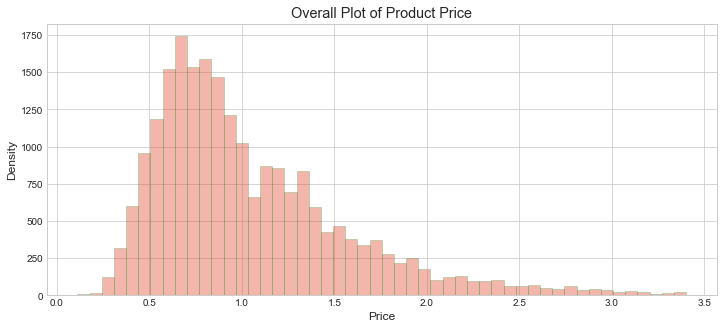

In [113]:
mp = m5.copy()
mp = mp.dropna()
fig = plt.figure(figsize = (12,5))
ax = fig.gca()
sns.distplot(mp['Price']/1000000, kde = False,hist_kws=dict(edgecolor="g")) 
ax.set_title('Overall Plot of Product Price')
ax.set_xlabel('Price')
ax.set_ylabel('Density')# Right skewed here
# distrtibution of price in millions overall
# not ideal for linear regression

## Quick Summary of EDA

- After analysis was done, some interesting insights between Price and independent variables were found
- The dataset has limitations that might affect the quality of the data
- More distinguishing features might be needed
- Spread of Categorical features can be an issue
- Relationship between Price and numerical might not be strong enough to contribute to model prediction
- Price is skewed to the right which might not comply with assumptions of linear models

## Feature Transformations 

In [114]:
m7 = m5.copy()
#We will be using Linear Regression as one of the models so we need to scale and transform our variables accordingly

In [115]:
m7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28031 entries, 0 to 34856
Data columns (total 21 columns):
Suburb               28031 non-null category
Address              28031 non-null category
Rooms                28031 non-null int64
Type                 28031 non-null category
Price                21959 non-null float64
Method               28031 non-null category
SellerG              28031 non-null category
Date                 28031 non-null datetime64[ns]
Distance             28031 non-null float64
Postcode             28031 non-null category
Car                  28031 non-null float64
CouncilArea          28031 non-null category
Regionname           28031 non-null object
Propertycount        28031 non-null float64
YearBuilt_random     28031 non-null category
Landsize_random      28031 non-null float64
Lattitude_random     28031 non-null float64
Longtitude_random    28031 non-null float64
Bathroom_random      28031 non-null float64
Year                 28031 non-null categor

In [116]:
#plot the distributions of our numericals
def plot_data(df, feature):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist = 'norm', plot = pylab)
    plt.show()

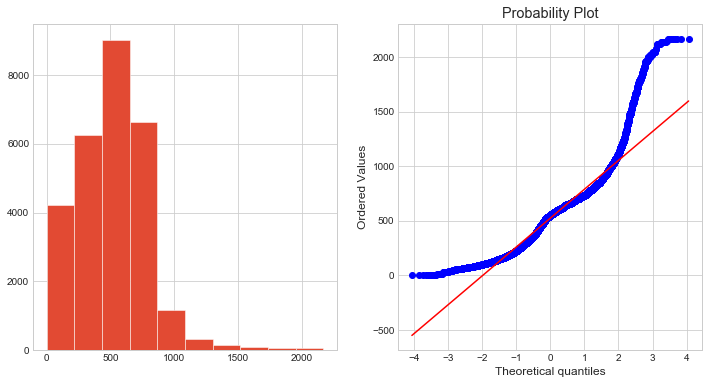

In [117]:
plot_data(m7, 'Landsize_random') #transformations might assist building a linear model, a good exercise.
# normality with independents might contribute to the linear model
# although multiple linear regression assumes normality of residuals not independents

In [118]:
m7['Landsize_square'] = m7.Landsize_random**(1/2) # this transformation worked well

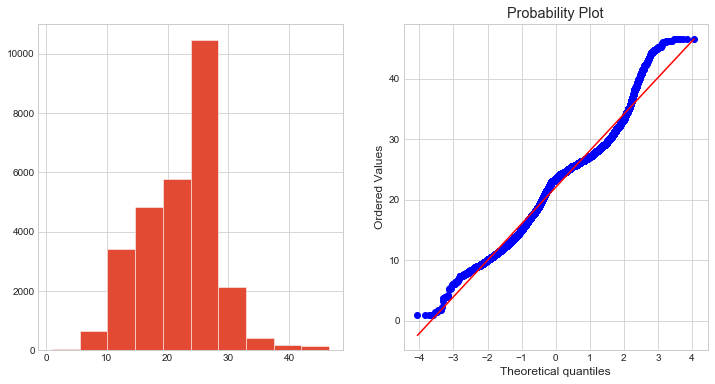

In [119]:
plot_data(m7, 'Landsize_square')

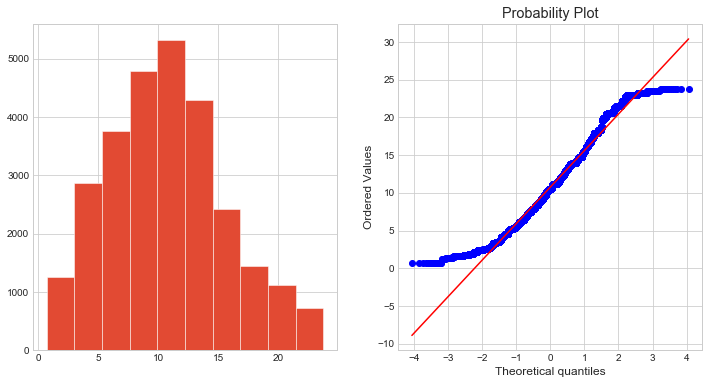

In [120]:
plot_data(m7, 'Distance') # we will keep this data, transformations did not improve the outcome

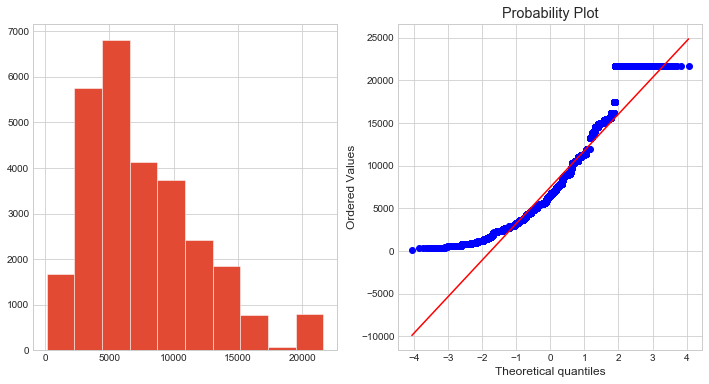

In [121]:
plot_data(m7, 'Propertycount')

In [122]:
m7['Propertycount_square'] = m7.Propertycount**(1/2)

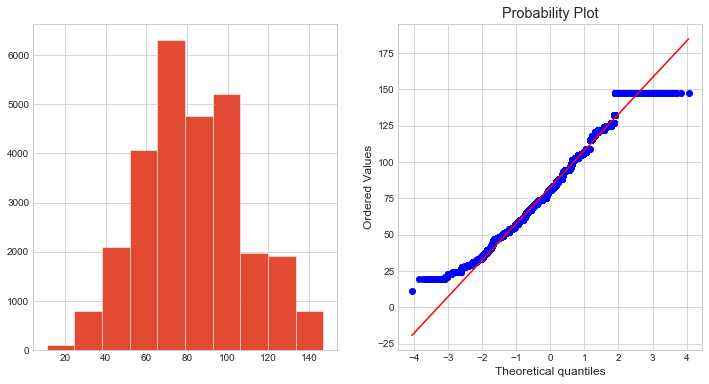

In [123]:
plot_data(m7, 'Propertycount_square') #better

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
m7[['Landsize_square', 'Propertycount_square', 'Distance']] = scaler.fit_transform(m7[['Landsize_square',
                                                                                      'Propertycount_square', 'Distance']])

In [125]:
#Dummy Variables for categoricals

In [126]:
m7.nunique() #some variables have a high amount of categories these will need to be dealt with accordingly

Suburb                    264
Address                 27407
Rooms                       5
Type                        3
Price                    2538
Method                      9
SellerG                   336
Date                       78
Distance                  162
Postcode                  152
Car                         5
CouncilArea                26
Regionname                  6
Propertycount             258
YearBuilt_random          119
Landsize_random          1355
Lattitude_random        11263
Longtitude_random       12228
Bathroom_random             3
Year                        3
Month                      12
Landsize_square          1355
Propertycount_square      258
dtype: int64

In [127]:
m7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28031 entries, 0 to 34856
Data columns (total 23 columns):
Suburb                  28031 non-null category
Address                 28031 non-null category
Rooms                   28031 non-null int64
Type                    28031 non-null category
Price                   21959 non-null float64
Method                  28031 non-null category
SellerG                 28031 non-null category
Date                    28031 non-null datetime64[ns]
Distance                28031 non-null float64
Postcode                28031 non-null category
Car                     28031 non-null float64
CouncilArea             28031 non-null category
Regionname              28031 non-null object
Propertycount           28031 non-null float64
YearBuilt_random        28031 non-null category
Landsize_random         28031 non-null float64
Lattitude_random        28031 non-null float64
Longtitude_random       28031 non-null float64
Bathroom_random         28031 non

In [128]:
m7['Type'].value_counts() #let's encode these by rank order here #we are trying to reduce adding dimensions if possible

h    19873
u     4859
t     3299
Name: Type, dtype: int64

In [129]:
m7['TypeNum'] = m7['Type'].map({'h':1,
                                    't':2, 
                                    'u':3 })

In [130]:
m7['Method'].value_counts()# many labels but we can use an ordinal approach based on value counts

S     16121
SP     3957
PI     3883
VB     2431
SN     1091
PN      224
SA      181
W       117
SS       26
Name: Method, dtype: int64

In [131]:
m7['MethodNum'] = m7['Method'].map({'S':1,'SP':2,'PI':3,'VB':4,'SN':5,'PN':6, 'SA':7, 'W': 8, 'SS': 9})

In [132]:
m7['Regionname'].value_counts() #we will get dummy variables here

S Metro     9333
N Metro     7842
W Metro     5837
E Metro     3998
SE Metro     987
N Vic         34
Name: Regionname, dtype: int64

In [133]:
dummy_col = ['Regionname'] #drop first dummy variable aswell
m7 = pd.get_dummies(m7, columns=dummy_col, drop_first = True, dtype='uint8') 

In [134]:
m7.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Month,Landsize_square,Propertycount_square,TypeNum,MethodNum,Regionname_N Metro,Regionname_N Vic,Regionname_S Metro,Regionname_SE Metro,Regionname_W Metro
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,0.077922,3067.0,...,3,0.224526,0.384867,1,9,1,0,0,0,0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,0.077922,3067.0,...,3,0.290131,0.384867,1,1,1,0,0,0,0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,0.077922,3067.0,...,4,0.190938,0.384867,1,3,1,0,0,0,0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,0.077922,3067.0,...,4,0.218586,0.384867,1,4,1,0,0,0,0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,0.077922,3067.0,...,6,0.417213,0.384867,1,5,1,0,0,0,0


In [135]:
#council area, suburb, sellerg have alot of labels,
#although these seem like too many we will do our best to not drop these variables
#we will encode the data by frequency

In [136]:
council_map = m7['CouncilArea'].value_counts().to_dict()

In [137]:
print(council_map)

{'Boroondara City Council': 2986, 'Darebin City Council': 2591, 'Moreland City Council': 1798, 'Banyule City Council': 1794, 'Glen Eira City Council': 1749, 'Bayside City Council': 1571, 'Moonee Valley City Council': 1538, 'Brimbank City Council': 1516, 'Monash City Council': 1371, 'Maribyrnong City Council': 1198, 'Melbourne City Council': 1086, 'Hume City Council': 1002, 'Stonnington City Council': 997, 'Manningham City Council': 983, 'Hobsons Bay City Council': 831, 'Port Phillip City Council': 790, 'Yarra City Council': 763, 'Kingston City Council': 686, 'Whittlesea City Council': 651, 'Whitehorse City Council': 589, 'Wyndham City Council': 533, 'Maroondah City Council': 471, 'Knox City Council': 224, 'Greater Dandenong City Council': 143, 'Melton City Council': 126, 'Nillumbik Shire Council': 44, 'Cardinia Shire Council': 0, 'Moorabool Shire Council': 0, 'Casey City Council': 0, 'Frankston City Council': 0, 'Macedon Ranges Shire Council': 0, 'Mitchell Shire Council': 0, 'Yarra Ran

In [138]:
m7['CouncilArea_num'] = m7['CouncilArea'].map(council_map)

In [139]:
m7.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize_square,Propertycount_square,TypeNum,MethodNum,Regionname_N Metro,Regionname_N Vic,Regionname_S Metro,Regionname_SE Metro,Regionname_W Metro,CouncilArea_num
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,0.077922,3067.0,...,0.224526,0.384867,1,9,1,0,0,0,0,763
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,0.077922,3067.0,...,0.290131,0.384867,1,1,1,0,0,0,0,763
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,0.077922,3067.0,...,0.190938,0.384867,1,3,1,0,0,0,0,763
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,0.077922,3067.0,...,0.218586,0.384867,1,4,1,0,0,0,0,763
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,0.077922,3067.0,...,0.417213,0.384867,1,5,1,0,0,0,0,763


In [140]:
pd.set_option("display.max_columns",100)

In [141]:
suburb_map = m7['Suburb'].value_counts().to_dict()

In [142]:
m7['Suburb_num'] = m7['Suburb'].map(suburb_map)

In [143]:
seller_map = m7['SellerG'].value_counts().to_dict()

In [144]:
m7['SellerG_num'] = m7['SellerG'].map(seller_map)

In [145]:
m7.head() #drop all columns we wont need
#address, latitude and longitude are just too granular so we will drop these before modelling
#Geo data is well represented here aside from lattitude and longtitude

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Car,CouncilArea,Propertycount,YearBuilt_random,Landsize_random,Lattitude_random,Longtitude_random,Bathroom_random,Year,Month,Landsize_square,Propertycount_square,TypeNum,MethodNum,Regionname_N Metro,Regionname_N Vic,Regionname_S Metro,Regionname_SE Metro,Regionname_W Metro,CouncilArea_num,Suburb_num,SellerG_num
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,0.077922,3067.0,1.0,Yarra City Council,4019.0,2014.0,126.0,-37.8014,144.9958,1.0,2016,3,0.224526,0.384867,1,9,1,0,0,0,0,763,89,2669
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,0.077922,3067.0,1.0,Yarra City Council,4019.0,2002.0,202.0,-37.7996,144.9984,1.0,2016,3,0.290131,0.384867,1,1,1,0,0,0,0,763,89,651
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,0.077922,3067.0,1.0,Yarra City Council,4019.0,1990.0,94.0,-37.7969,144.9969,2.0,2017,4,0.190938,0.384867,1,3,1,0,0,0,0,763,89,651
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,0.077922,3067.0,2.0,Yarra City Council,4019.0,2014.0,120.0,-37.8072,144.9941,1.0,2016,4,0.218586,0.384867,1,4,1,0,0,0,0,763,89,2688
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,0.077922,3067.0,2.0,Yarra City Council,4019.0,2006.0,400.0,-37.7965,144.9965,2.0,2016,6,0.417213,0.384867,1,5,1,0,0,0,0,763,89,2688


In [146]:
m8 = m7.drop(['Suburb', 'Address', 'Type','Method', 'SellerG',
              'Date','CouncilArea','Propertycount', 'Landsize_random',
             'Lattitude_random', 'Longtitude_random'], axis = 1)

In [147]:
m8.head()

,Rooms,Price,Distance,Postcode,Car,YearBuilt_random,Bathroom_random,Year,Month,Landsize_square,Propertycount_square,TypeNum,MethodNum,Regionname_N Metro,Regionname_N Vic,Regionname_S Metro,Regionname_SE Metro,Regionname_W Metro,CouncilArea_num,Suburb_num,SellerG_num
0,2,NaN,0.077922,3067.0,1.0,2014.0,1.0,2016,3,0.224526,0.384867,1,9,1,0,0,0,0,763,89,2669
1,2,1480000.0,0.077922,3067.0,1.0,2002.0,1.0,2016,3,0.290131,0.384867,1,1,1,0,0,0,0,763,89,651
5,3,850000.0,0.077922,3067.0,1.0,1990.0,2.0,2017,4,0.190938,0.384867,1,3,1,0,0,0,0,763,89,651
6,4,1600000.0,0.077922,3067.0,2.0,2014.0,1.0,2016,4,0.218586,0.384867,1,4,1,0,0,0,0,763,89,2688
7,4,NaN,0.077922,3067.0,2.0,2006.0,2.0,2016,6,0.417213,0.384867,1,5,1,0,0,0,0,763,89,2688


In [148]:
m8['Postcode'] = m8['Postcode'].astype('float') #back to numerical datatypes
m8[['YearBuilt_random', 'Year']] = m8[['YearBuilt_random', 'Year']].astype('int')

## Feature Selection before modelling
- Mutual info for regression technique was used to select best features for model building
- Also we decided to use cross validation for training and testing our data so we will drop null dependent values
- Imputution of null Price values were avoided in order to preserve the originality of the dependent variable

In [149]:
m9 = m8.copy()

In [150]:
m9 = m9.dropna()

In [151]:
m9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21959 entries, 1 to 34856
Data columns (total 21 columns):
Rooms                   21959 non-null int64
Price                   21959 non-null float64
Distance                21959 non-null float64
Postcode                21959 non-null float64
Car                     21959 non-null float64
YearBuilt_random        21959 non-null int32
Bathroom_random         21959 non-null float64
Year                    21959 non-null int32
Month                   21959 non-null int64
Landsize_square         21959 non-null float64
Propertycount_square    21959 non-null float64
TypeNum                 21959 non-null int64
MethodNum               21959 non-null int64
Regionname_N Metro      21959 non-null uint8
Regionname_N Vic        21959 non-null uint8
Regionname_S Metro      21959 non-null uint8
Regionname_SE Metro     21959 non-null uint8
Regionname_W Metro      21959 non-null uint8
CouncilArea_num         21959 non-null int64
Suburb_num            

In [152]:
X = m9.drop('Price', axis = 'columns')
X.head()

,Rooms,Distance,Postcode,Car,YearBuilt_random,Bathroom_random,Year,Month,Landsize_square,Propertycount_square,TypeNum,MethodNum,Regionname_N Metro,Regionname_N Vic,Regionname_S Metro,Regionname_SE Metro,Regionname_W Metro,CouncilArea_num,Suburb_num,SellerG_num
1,2,0.077922,3067.0,1.0,2002,1.0,2016,3,0.290131,0.384867,1,1,1,0,0,0,0,763,89,651
5,3,0.077922,3067.0,1.0,1990,2.0,2017,4,0.190938,0.384867,1,3,1,0,0,0,0,763,89,651
6,4,0.077922,3067.0,2.0,2014,1.0,2016,4,0.218586,0.384867,1,4,1,0,0,0,0,763,89,2688
10,2,0.077922,3067.0,0.0,1958,1.0,2016,7,0.273464,0.384867,1,1,1,0,0,0,0,763,89,2669
11,3,0.077922,3067.0,0.0,1910,2.0,2016,7,0.321747,0.384867,1,1,1,0,0,0,0,763,89,2688


In [153]:
y = m9['Price']
y.head() 

1     1480000.0
5      850000.0
6     1600000.0
10     941000.0
11    1876000.0
Name: Price, dtype: float64

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)

In [155]:
X_train.head()

,Rooms,Distance,Postcode,Car,YearBuilt_random,Bathroom_random,Year,Month,Landsize_square,Propertycount_square,TypeNum,MethodNum,Regionname_N Metro,Regionname_N Vic,Regionname_S Metro,Regionname_SE Metro,Regionname_W Metro,CouncilArea_num,Suburb_num,SellerG_num
8083,2,0.164502,3181.0,2.0,1970,2.0,2016,11,0.508694,0.564469,3,4,0,0,1,0,0,997,213,1966
29162,3,0.766234,3029.0,2.0,1985,1.0,2017,11,0.576589,0.479141,3,1,0,0,0,0,1,126,26,1966
31041,3,0.606061,3030.0,2.0,2015,1.0,2018,3,0.603764,0.853137,3,1,0,0,0,0,1,533,175,1966
5087,5,0.562771,3188.0,2.0,2011,3.0,2016,11,0.556515,0.461668,1,1,0,0,1,0,0,1571,249,1966
11244,4,0.506494,3060.0,3.0,1990,2.0,2016,8,0.328003,0.442223,1,4,1,0,0,0,0,1002,206,612


### Mutual information for Regression

Mutual Information for regression is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.
In short a quantity called mutual information measures the amount of information one can obtain from random variable given another

In [156]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.17125964, 0.24922381, 0.35528812, 0.02760718, 0.00315147,
       0.03940203, 0.        , 0.00705814, 0.01687255, 0.24398906,
       0.12784701, 0.10797963, 0.03763646, 0.00090617, 0.08945602,
       0.0031746 , 0.02300617, 0.25424231, 0.20190047, 0.11918255])

In [157]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Postcode                0.355288
CouncilArea_num         0.254242
Distance                0.249224
Propertycount_square    0.243989
Suburb_num              0.201900
Rooms                   0.171260
TypeNum                 0.127847
SellerG_num             0.119183
MethodNum               0.107980
Regionname_S Metro      0.089456
Bathroom_random         0.039402
Regionname_N Metro      0.037636
Car                     0.027607
Regionname_W Metro      0.023006
Landsize_square         0.016873
Month                   0.007058
Regionname_SE Metro     0.003175
YearBuilt_random        0.003151
Regionname_N Vic        0.000906
Year                    0.000000
dtype: float64

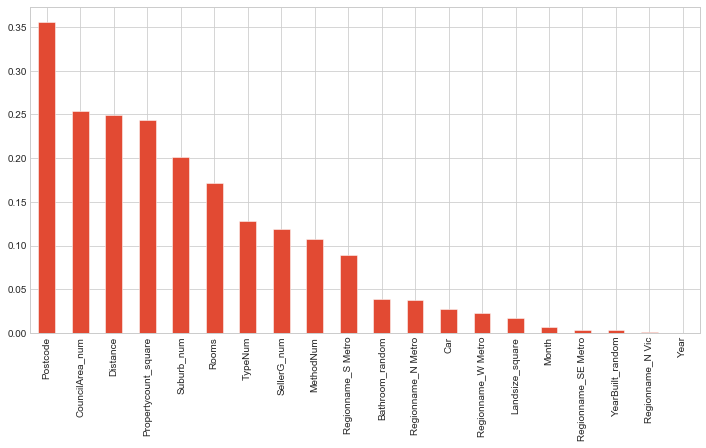

In [158]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (12, 6))

## Feature Transformation and Selection Summary

- Numerical variables were transformed in order to comply better with Linear Model Assumptions
- Numerical variables were scaled so different ranges and units of measurement can be handled by the model accordingly
- Select Categorical variables were encoded with dummy numerical values to satisfy model input requirements
- Some categoricals had too many labels, if dummy values were used here the dimensionality of the dataset might have increased too drastically and degraded model performance. Here different techniques were used such as frequency and ordinal replacement.
- For Feature selection of both numerical and categorical features we applied the mutual information for regression technique

# Model Building

## Linear Regression

- Linear regression is a popular model that is simple to use but does make assumptions for the data provided. If the Data follows these assumptions it can be powerfull but if not it can struggle with accuracy.
- Ordinary least squares method is used to fit the line
- Assumptions include no correlation between Independent variables 
- A linear and additive relationship is assumed between features and target variable.
- A normal distribution is assumed for dependent variable and residuals.
- These assumptions are a disadvantage if not met

## Reasoning behind using Train Test split 

- Using the entire Dataset as training will cause overfitting in the model.
- Did notice a stratify parameter but it looks more useful in classification models with an unbalanced target variable.
- Drawback of train test split is High Variance so we will use Cross Validation just too see if it's better for one model.
- As we know we look for a model with low bias and low variance so there is a tradeoff.

In [159]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
print(lr1.intercept_)
list(zip(X, lr1.coef_))

-62667742.33915856


[('Rooms', 210928.9710660829),
 ('Distance', -1065697.4210093112),
 ('Postcode', 485.62796219500734),
 ('Car', 18421.027840244747),
 ('YearBuilt_random', -523.9501290440522),
 ('Bathroom_random', 69966.2838229438),
 ('Year', 31332.999556510447),
 ('Month', 879.4657883375195),
 ('Landsize_square', 181605.94889326216),
 ('Propertycount_square', 48581.29211993242),
 ('TypeNum', -218851.6382530236),
 ('MethodNum', -17313.583186060823),
 ('Regionname_N Metro', -314508.24993812124),
 ('Regionname_N Vic', 104880.57533169969),
 ('Regionname_S Metro', 158587.1831193884),
 ('Regionname_SE Metro', 133472.1486243531),
 ('Regionname_W Metro', -316894.930465061),
 ('CouncilArea_num', 54.39525951262106),
 ('Suburb_num', -40.86980281839657),
 ('SellerG_num', 5.704502803122468)]

In [160]:
lr1.score(X_test,y_test)

0.6103133413191422

In [161]:
#Adjusted R square a better metric
#Did not find a built-in that calculates this metric in sklearn
1 - (1-lr1.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6091265386430926

In [162]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 0)

cross_val_score(LinearRegression(), X, y, cv = cv) #cross validation not much different

array([0.61409604, 0.5974643 , 0.59770919, 0.60562672, 0.61065394])

In [163]:
from sklearn import metrics
y_pred = lr1.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #

329043.8921230587


In [164]:
A = m9.drop(['Price','Month','Year', 'Regionname_N Vic','Regionname_SE Metro' ], axis = 'columns')
A.head() #Dropping non important columns that might create noise

,Rooms,Distance,Postcode,Car,YearBuilt_random,Bathroom_random,Landsize_square,Propertycount_square,TypeNum,MethodNum,Regionname_N Metro,Regionname_S Metro,Regionname_W Metro,CouncilArea_num,Suburb_num,SellerG_num
1,2,0.077922,3067.0,1.0,2002,1.0,0.290131,0.384867,1,1,1,0,0,763,89,651
5,3,0.077922,3067.0,1.0,1990,2.0,0.190938,0.384867,1,3,1,0,0,763,89,651
6,4,0.077922,3067.0,2.0,2014,1.0,0.218586,0.384867,1,4,1,0,0,763,89,2688
10,2,0.077922,3067.0,0.0,1958,1.0,0.273464,0.384867,1,1,1,0,0,763,89,2669
11,3,0.077922,3067.0,0.0,1910,2.0,0.321747,0.384867,1,1,1,0,0,763,89,2688


In [165]:
b = m9['Price']
b.head()

1     1480000.0
5      850000.0
6     1600000.0
10     941000.0
11    1876000.0
Name: Price, dtype: float64

In [166]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A,b,test_size = 0.3, random_state = 10) 

In [167]:
lr2 = LinearRegression()
lr2.fit(A_train, b_train)
print(lr2.intercept_)
list(zip(A, lr2.coef_))

317244.1839977086


[('Rooms', 208902.00563159908),
 ('Distance', -1035224.7878338401),
 ('Postcode', 562.095908770837),
 ('Car', 21337.08211288831),
 ('YearBuilt_random', -533.699742236611),
 ('Bathroom_random', 69964.78100502428),
 ('Landsize_square', 182915.30741020065),
 ('Propertycount_square', 73931.71945099626),
 ('TypeNum', -217151.6808334431),
 ('MethodNum', -16334.684470740647),
 ('Regionname_N Metro', -333447.5088511826),
 ('Regionname_S Metro', 130609.46326025648),
 ('Regionname_W Metro', -335028.91836636956),
 ('CouncilArea_num', 53.86229252375281),
 ('Suburb_num', -81.50902381350137),
 ('SellerG_num', 5.649413887546979)]

In [168]:
lr2.score(A_test,b_test) #R squared 

0.6086890494934156

In [169]:
1 - (1-lr2.score(A_test, b_test))*(len(b_test)-1)/(len(b_test)-A_test.shape[1]-1) # adjusted Rsquared

0.607736230256145

In [170]:
b_pred = lr2.predict(A_test)
print(np.sqrt(metrics.mean_squared_error(b_test, b_pred))) # rmse similar here
# After feature selection

329728.93934322277


In [171]:
C = m9.drop(['Price','Month','Year', 'Regionname_N Vic',
             'Regionname_SE Metro', 'Suburb_num', 'SellerG_num','CouncilArea_num' ], axis = 'columns')
C.head() #Some highly granular categoricals were also used we will drop those and test

,Rooms,Distance,Postcode,Car,YearBuilt_random,Bathroom_random,Landsize_square,Propertycount_square,TypeNum,MethodNum,Regionname_N Metro,Regionname_S Metro,Regionname_W Metro
1,2,0.077922,3067.0,1.0,2002,1.0,0.290131,0.384867,1,1,1,0,0
5,3,0.077922,3067.0,1.0,1990,2.0,0.190938,0.384867,1,3,1,0,0
6,4,0.077922,3067.0,2.0,2014,1.0,0.218586,0.384867,1,4,1,0,0
10,2,0.077922,3067.0,0.0,1958,1.0,0.273464,0.384867,1,1,1,0,0
11,3,0.077922,3067.0,0.0,1910,2.0,0.321747,0.384867,1,1,1,0,0


In [172]:
d = m9['Price']
d.head()

1     1480000.0
5      850000.0
6     1600000.0
10     941000.0
11    1876000.0
Name: Price, dtype: float64

In [173]:
C_train, C_test, d_train, d_test = train_test_split(C,d,test_size = 0.3, random_state = 10) 

In [174]:
lr3 = LinearRegression()
lr3.fit(C_train, d_train)
print(lr3.intercept_)
list(zip(A, lr3.coef_))

940054.7599766142


[('Rooms', 212255.9750767733),
 ('Distance', -1065752.588420259),
 ('Postcode', 404.61842587859496),
 ('Car', 22614.64012031667),
 ('YearBuilt_random', -565.1588241662528),
 ('Bathroom_random', 69720.1917641653),
 ('Landsize_square', 193270.41356452534),
 ('Propertycount_square', 48802.43596321288),
 ('TypeNum', -217785.42434383772),
 ('MethodNum', -15522.107256417321),
 ('Regionname_N Metro', -321271.9782187617),
 ('Regionname_S Metro', 161267.94994150376),
 ('Regionname_W Metro', -350948.6007594004)]

In [175]:
lr3.score(C_test,d_test)

0.6052068362700591

In [176]:
d_pred = lr3.predict(C_test)
print(np.sqrt(metrics.mean_squared_error(d_test, d_pred)))

331192.79231260635


In [177]:
1 - (1-lr3.score(C_test, d_test))*(len(d_test)-1)/(len(d_test)-C_test.shape[1]-1) # adjusted Rsquared

0.6044261378933495

In [178]:
# with the scoring quite poor let us see if a linear model is the right fit for this Data

In [179]:
from yellowbrick.regressor import ResidualsPlot

C:\Users\shehz\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


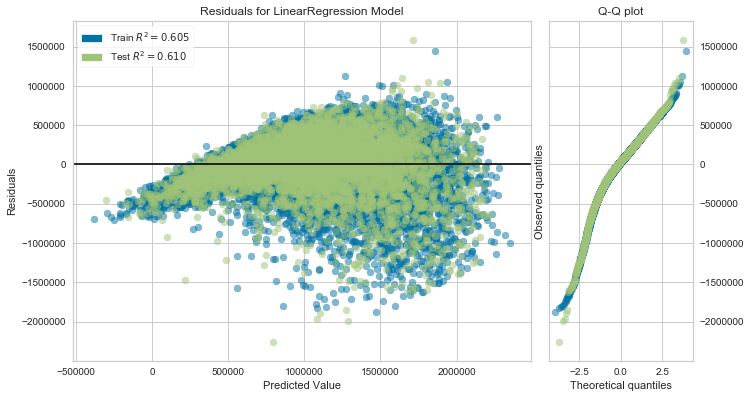

In [207]:
visualizer = ResidualsPlot(lr1, hist = False, qqplot = True, train_alpha = 0.5, test_alpha = 0.5, size = (800, 450))
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()  
#Looking at the Residual vs fitted plot we see a slight U shape which indicates non-linearity in the data set 
#as well as a slight funnel shape which indicates some heteroskedestacity(error terms have a non constant variance)
#we should try a different model not bound by the assumptions and restrictions of a Linear Model

## Linear Regression summary from residual plot report

- Looking at the Residual vs fitted plot we see a slight U shape which indicates non-linearity in the data set as well as a slight funnel shape which indicates some heteroskedestacity(error terms have a non constant variance)
-  The qqplot does not indicate normality of resduals here as the plotted line is not straight
- We should try a different model not bound by the assumptions and restrictions of a Linear Model
- Linear Regression did provide a great insight and understanding of the dataset in question

## Evaluation

- For Model Evaluation I used Rsquared and Root Mean Squared Error as metrics
- Rsquared explains the percentage of variance explained by covariates in the model, a higher value is good here
- Adjusted R squared which compensates for additional variables in a better way than R-Squared(Lower)
- RMSE is an error metric, showing the error between observed and predicted values so we want the value to be smaller comparatively
- It does amplify the effect of outliers so that could be a disadvantage although we did deal with outliers in our Data Analysis phase

After achieving a performance of around **61%** for our different variations of the Linear Regression models applied and
looking at the Residual vs fitted plot where we see a slight U shape which indicates non-linearity in the data set 
as well as a slight funnel shape which indicates some heteroskedestacity(error terms have a non constant variance),
we should try a different model not bound by the assumptions and restrictions of a Linear Model

## Random Forest Regressor

- The reason I chose this model is because it is a non-parametric model that follows no distribution assumptions that handles skewed multi-model data as well as data with different categorical features.
- It's an example of ensemble learning that combines the results of multiple models(Tree algorithms in this case)
- Random Forest is a bagging technique which uses sampling with replacement.
- It is less restrictive to the Linear model chosen above
- One of the most accurate learning algorithms
- It assesses feature importance which we will do later(quite cool)
- There are drawbacks though(there is no free lunch)
- It is biased to favor categoricals that have many levels (might be biased with the feature importance metric too then)
- Can overfit noisy datasets

In [181]:
m10 = m7.drop(['Suburb', 'Address', 'Type','Method', 'SellerG',
              'Date','CouncilArea','Propertycount_square', 'Landsize_square',
             'Lattitude_random', 'Longtitude_random'], axis = 1) #normalized variables can be dropped for the ensemble model

In [182]:
m10.head()

,Rooms,Price,Distance,Postcode,Car,Propertycount,YearBuilt_random,Landsize_random,Bathroom_random,Year,Month,TypeNum,MethodNum,Regionname_N Metro,Regionname_N Vic,Regionname_S Metro,Regionname_SE Metro,Regionname_W Metro,CouncilArea_num,Suburb_num,SellerG_num
0,2,NaN,0.077922,3067.0,1.0,4019.0,2014.0,126.0,1.0,2016,3,1,9,1,0,0,0,0,763,89,2669
1,2,1480000.0,0.077922,3067.0,1.0,4019.0,2002.0,202.0,1.0,2016,3,1,1,1,0,0,0,0,763,89,651
5,3,850000.0,0.077922,3067.0,1.0,4019.0,1990.0,94.0,2.0,2017,4,1,3,1,0,0,0,0,763,89,651
6,4,1600000.0,0.077922,3067.0,2.0,4019.0,2014.0,120.0,1.0,2016,4,1,4,1,0,0,0,0,763,89,2688
7,4,NaN,0.077922,3067.0,2.0,4019.0,2006.0,400.0,2.0,2016,6,1,5,1,0,0,0,0,763,89,2688


In [183]:
m10['Postcode'] = m10['Postcode'].astype('float') #back to numerical datatypes
m10[['YearBuilt_random', 'Year']] = m10[['YearBuilt_random', 'Year']].astype('int')

In [184]:
m10 = m10.dropna()

In [185]:
import sklearn.ensemble as ske

In [186]:
Ranreg = ske.RandomForestRegressor()

In [187]:
E = m10.drop('Price', axis = 'columns')
E.head()

,Rooms,Distance,Postcode,Car,Propertycount,YearBuilt_random,Landsize_random,Bathroom_random,Year,Month,TypeNum,MethodNum,Regionname_N Metro,Regionname_N Vic,Regionname_S Metro,Regionname_SE Metro,Regionname_W Metro,CouncilArea_num,Suburb_num,SellerG_num
1,2,0.077922,3067.0,1.0,4019.0,2002,202.0,1.0,2016,3,1,1,1,0,0,0,0,763,89,651
5,3,0.077922,3067.0,1.0,4019.0,1990,94.0,2.0,2017,4,1,3,1,0,0,0,0,763,89,651
6,4,0.077922,3067.0,2.0,4019.0,2014,120.0,1.0,2016,4,1,4,1,0,0,0,0,763,89,2688
10,2,0.077922,3067.0,0.0,4019.0,1958,181.0,1.0,2016,7,1,1,1,0,0,0,0,763,89,2669
11,3,0.077922,3067.0,0.0,4019.0,1910,245.0,2.0,2016,7,1,1,1,0,0,0,0,763,89,2688


In [188]:
f = m10['Price']
f.head()

1     1480000.0
5      850000.0
6     1600000.0
10     941000.0
11    1876000.0
Name: Price, dtype: float64

In [189]:
E_train, E_test, f_train, f_test = train_test_split(E,f,test_size = 0.3, random_state = 10) 

In [190]:
Ranreg.fit(E_train,f_train)

RandomForestRegressor()

In [191]:
Ranreg.score(E_test,f_test) #much better r squared here

0.7714585044781586

In [192]:
1 - (1-Ranreg.score(E_test, f_test))*(len(f_test)-1)/(len(f_test)-E_test.shape[1]-1) # adjusted Rsquared

0.7707624743410432

In [193]:
f_pred = Ranreg.predict(E_test)
print(np.sqrt(metrics.mean_squared_error(f_test, f_pred))) #much lower rmse here

251987.26760829688


In [194]:
G = m10.drop(['Price','Month','Year', 'Regionname_N Vic','Regionname_SE Metro' ], axis = 'columns')
G.head() #dropping non important columns according to previous feature selection

,Rooms,Distance,Postcode,Car,Propertycount,YearBuilt_random,Landsize_random,Bathroom_random,TypeNum,MethodNum,Regionname_N Metro,Regionname_S Metro,Regionname_W Metro,CouncilArea_num,Suburb_num,SellerG_num
1,2,0.077922,3067.0,1.0,4019.0,2002,202.0,1.0,1,1,1,0,0,763,89,651
5,3,0.077922,3067.0,1.0,4019.0,1990,94.0,2.0,1,3,1,0,0,763,89,651
6,4,0.077922,3067.0,2.0,4019.0,2014,120.0,1.0,1,4,1,0,0,763,89,2688
10,2,0.077922,3067.0,0.0,4019.0,1958,181.0,1.0,1,1,1,0,0,763,89,2669
11,3,0.077922,3067.0,0.0,4019.0,1910,245.0,2.0,1,1,1,0,0,763,89,2688


In [195]:
h = m10['Price']
h.head()

1     1480000.0
5      850000.0
6     1600000.0
10     941000.0
11    1876000.0
Name: Price, dtype: float64

In [196]:
G_train, G_test, h_train, h_test = train_test_split(G,h,test_size = 0.3, random_state = 10) 

In [197]:
Ranreg1 = ske.RandomForestRegressor()

In [198]:
Ranreg1.fit(G_train,h_train)

RandomForestRegressor()

In [199]:
Ranreg1.score(G_test,h_test) #not much difference here ,great those features did not contribute

0.7719319394230688

In [200]:
1 - (1-Ranreg1.score(G_test, h_test))*(len(h_test)-1)/(len(h_test)-G_test.shape[1]-1) # adjusted Rsquared

0.7713766070582491

In [201]:
h_pred = Ranreg1.predict(G_test)
print(np.sqrt(metrics.mean_squared_error(h_test, h_pred))) #much lower rmse here

251726.1302912024


In [202]:
from sklearn.model_selection import RandomizedSearchCV
#We will try some hyperparameter tuning here as Random Forest has a fews options to choose from
# 5 fold cross validation will also be used here for optimum training

In [203]:
param_dist = {
    'bootstrap': [True, False], #sampling with or without replacment
    'max_depth': [10,15,20,30 ], #max tree depth
    'min_samples_leaf': [1,2,3], #min number of data points allowed in a leaf
    'min_samples_split': [2,3,4], # data points placed in a node before split
    'n_estimators': [10, 13, 15]# number of trees in forest
}

In [204]:
rand_search = RandomizedSearchCV(Ranreg, param_dist, cv = 5, n_iter = 15)
rand_search.fit(G_train,h_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=15,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 30],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [10, 13, 15]})

In [205]:
print(rand_search.best_score_)
print(rand_search.best_params_) #trying abit of tuning did not help much here. Could go more in depth

0.7599022995955032
{'n_estimators': 15, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 15, 'bootstrap': True}


## Random Forest Evaluation

- Rsquared and RMSE was used here as well to keep things comparable
- I tried 2 variations here
- 1st Model used default parameters with an adjusted Rsquared of **77%**(Big Improvement here compared to Linear Model)
- 2nd Model used the best features after feature selection
- Feature Selection was a success as dropped features were not contributing to the model
- Some parameter tuning was tried thereafter here. There were so many parameters to work with so I researched the most important ones and tried a few values of each using Randomized search CV. It's a great model selection helper that is automated and randomized.
- I did try GridSearch CV before but it took too long to process. Although this would have been a more detailed approach.
- Tuning paramaters did not result in a better model but I will have to do further research on these parameters to get the best out of them in the future.
- This model gave us better performance and great insight into what features were important in the modelling process
- PCA(Dimensionality reduction) not needed here as dimensions have not increased dramatically during data preprocessing
- Did attempt to drop highly spread out categoricals as well with little success

**Best Performing Model:** Random Forest Regressor with an adjusted Rsquare of  **+-77%** with default parameters

# Final Decision

- After the data analysis process the Random Forest ensemble technique did provide the best performing prediction model
- However further research will need to be done with clients and domain experts in order to acquire more data that will add value to the machine learning model
- I would suggest adding Variables such as "Schools nearby": Yes or No, "Parks nearby": Yes or No, "Crime Rate": High, Medium, Low, "Finished Basement": Yes or No, "Roof Age": Integer Value.
- The Housing market does change with time so we would have to update the model periodically for best results. Adding and droppping features as we learn more and taking market trends into consideration to make our deployed model achieve it's potential.